# Course 4: Troubleshooting and Debugging Techniques

> Remember, the main goal is to learn from our mistakes. 

> When debugging a problem, we want to consider the simplest explanations first and avoid jumping into complex or time-consuming solutions unless we really have to.

>Remember to always have a clear picture of what the problem is before you start solving it. 

## Week 1: Introduction to Debugging


* **Troubleshooting** is the process of identifying, analyzing and solving problems.
* **Debugging** is the process of identifying, analysing and removing bugs in a system.
* **Debuggers** let us follow the code line by line, inspect changes in variable assignments, interrupt the program when a specific condition is met and more.

### Problem solving steps:

1. Getting information

        Get as much information as you need for the current state of things. Use the documentation.
        Reproduction case: A clear description of how and when the problem appears
        The reproduction case is very important information for solving a problem.

2. Finding the root cause

        Get to the bottom of what's going on and find out what triggered the problem.
        
3. Performing the necessary remediation

        Fix the problem short term to fix the code and get the pipeline running.
        Fix the problem long term so the error doesn't happen again.

* Reminder:
       
       Throughout the whole process, it's important that we document what we do. 
       Note down the info that we get, the different things we tested to try, and figure out the root cause. 
       Finally, the steps we took to fix the issue.
       
**strace** is a command line tool that will trace a systems calls made by the program and tell us the result of each of these calls was.

**ltrace** is used to look at library calls made by the software.

Example command:

```bash
strace ./purplebox.py # Outputs the system calls to terminal
strace -o failure.strace ./purplebox.py # Outputs the system calls to failure.strace file
less failure.strace # Scroll through the file with less

# You can also use piping
strace ./purplebox.py | less # Scroll through the system calls
```

**System calls** are calls the programs running on our computer make to the running kernel.

### Understanding the problem

### 1. Problem solving questions

* What were you trying to do?
* What steps did you follow?
* What was the expected result?
* What was the actual result?

The **load average** on Linux shows how much time a processor is busy in a given minute, with one meaning it was busy for the whole minute. So normally <i><u>this number shouldn't be above the amount of processors in the computer</u></i>. 

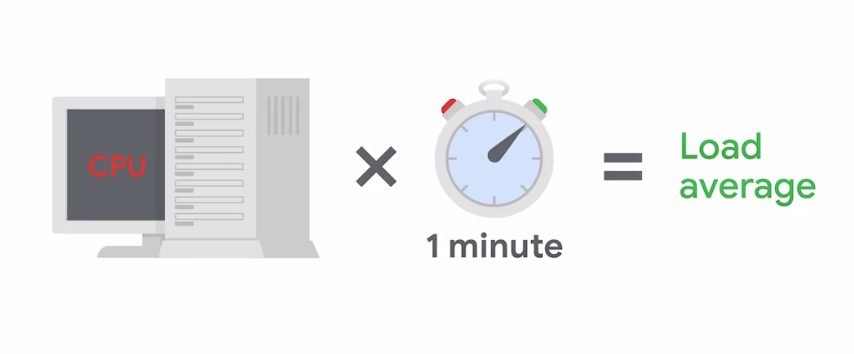

```bash
kill -STOP # stop the backup system in the video example
```

### 2.Create a Reproduction Case

**Reproduction case**: a way to verify if the problem is present or not

The first step is to read the logs available to you. Which logs to read, will depend on the operating system and the application that you're trying to debug.

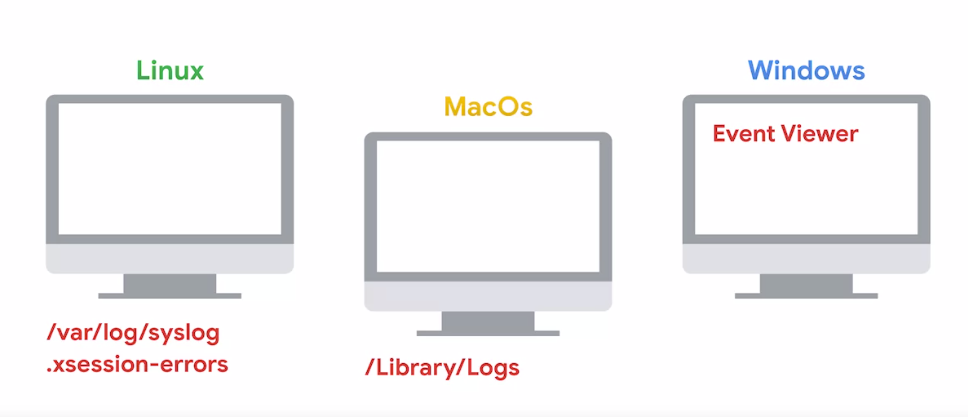

 Lots of times, you'll find an error message that will help you understand what's going on like, unable to reach server, invalid file format, or permission denied. But what if you're unlucky, and there's no error message, or the error message is super unhelpful like internal system error. 
 
The next step is to try to isolate the conditions that trigger the issue:
 
* Do other users in the same office also experienced the problem? 
* Does the same thing happen if the same user logs into a different computer? 
* Does the problem happen if the applications config directory is moved away?

### 3. Finding the Root Cause

> Understanding the root cause is essential for performing the long-term remediation.

* Whenever possible, we should check our hypotesis in a test enviroment, instead of the production enviroment that our users are working with.

Generally, understanding the root cause is essential for providing the long term solution.

Tools:
* iotop - command similar to top that let's us see what processes use the most inputs and outputs
* iostat - command that shows statistics on the input and output
* vmstat  - command that shows statistics on the virtual memory operations
* iftop - command that shows the current traffic on the network interfaces

If the issue is that the process generates too much input or output, we could use a command like ionice to make our backup system reduce its priority to access the disk and let the web services use it too. 

If the backup is eating all the network bandwidth, we could look at the documentation for the backup software and check if it already includes an option to limit the bandwidth. The rsync command, which is often used for backing up data, includes a -bwlimit, just for this purpose. If that option isn't available, we can use a program like Trickle to limit the bandwidth being used. 

### 4. Dealing with Intermitent Issues

For bugs that occur at random times, we need to repair our system to give us as much information as possible when the bug happens. This might require several iterations until we get enough information to understand the issue, but don't lose hope. Most of the time, you can finally get to the point where you can actually understand what's going on. Sometimes, the bug goes away when we add extra logging information, or when we follow the code step by step using a debugger.

**Haisenbug**:
    
    A software bug that seems to disappear or alter its behavior when one attempts to study it.

**Observer phenomenon**:

    Observing a phenomenon alters the phenomenon
    
> If a problem goes away by turning it off and on again, there's almost certainly a bug in the software, and the bug probably has to do with not managing resources correctly.


### Binary Searching a Problem

* Use the bisect method to find the error in a lenghty file.

```bash
head -15 contacts.csv # Prints the first 15 lines of the csv file
tail -15 contacts.csv # Prints the last 15 lines of the csv file
```

## Week 2
### Understanding Slowness

#### Slow Web Server

```bash
ab -n 500 site.example.com/ # makes 500 requests to check if the site is behaving as expected

# Use top

nice # command for starting a process with a different priority
renice # command for changing the priority of a  process that's already running
pidof # command that receives the process name and returns all the process IDs that have that name. 


# Bash oneliner to change the priority of ffmpeg from 0 to 19
for pid in $(pidof ffmpeg); do renice 19 $pid; done

# Another trick to making the website run faster is to make processes run one after the other
# instead of all at the same time
# We now want to run these processes one at a time
# We could send the CONT signal to one of them, wait till it's done, and then send it to the next one.

ps ax | less # Shows all the running processes on the computer and read with less

locate static/001.webm # command to locate the file on the computer

# Use grep to see if any files contain a call to ffmpeg
grep ffmpeg *

killall -STOP ffmpeg # Stops the process, but doesn't kill it completely

# Bash one-liner to do the ffmpeg process one by one using the CONT command
for pid in $(pidof ffmpeg); do while kill -CONT $pid; do sleep 1; done; done 
```


**Profiler**:
            
    A tool that measures the resources that our code is using, giving us a better understanding of what's going on. For example gprof for a C program and the cProfile module to analyze a python program.

### Slow Code

> If you do an expensive operation inside a loop, you multiply the time it takes to do the expensive operation by the amount of times you repeat the loop. Remeber to break out of the loop once you found what you were looking for.

Time command result explained:

* Real: The amount of actual time that it took to execute the command, sometimes called WallClock time
* User: Time spent doing operations in the user space
* Sys: Time spent doing system-level operations

Python profiler used: pprofile3

Read the profile generated: kcachegrind

```bash

# Profile command to see why the ./send_reminders.py scripts takes longer than expected
# -f to use the callgrind call format and -o to output

pprofile3 -f callgrind  -o profile.out ./send_reminders.py "2021-02-02| Example| test1, test2, test3, test4, test5, test6, test7, test8, test9"

# To read profile.out we will use kcachegrind
```

**Threads**:

     Let us run parallel tasks inside a process.

**Executor**:

    The process that's in charge of distributing the work amongst differnt workers


> A script is CPU bound if you're running operations in parallel using all available CPU time.  

**Concurrency** is a field of study dedicated to understanding how to write programs that run operations in parallel.

**Varnish** a caching service that would speed up the load of dynamically created pages of a website.

The **futures module** makes it possible to run operations in parallel using different executors. 

Concurrency articles:

* https://realpython.com/python-concurrency/

* https://hackernoon.com/threaded-asynchronous-magic-and-how-to-wield-it-bba9ed602c32

```Memory bound``` refers to a situation where the time necessary to solve a given computational task is largely dictated by the amount of memory needed to retain data. 

```Memchached``` is a caching service that keeps most commonly accessed database queries in RAM.

```rsync(remote sync)``` is a utility for efficiently transferring and synchronizing files between a computer and an external hard drive and across networked computers by comparing the modification time and size of files. 

Basic syntax in bash

```bash
rsync [Options] [Source-Files-Dir] [Destination]

#Copy or sync files locally
rsync -zvh [Source-Files-Dir] [Destination]

#Copy or sync directory locally:
rsync -zavh [Source-Files-Dir] [Destination]

#Copy files and directories recursively locally:
rsync -zrvh [Source-Files-Dir] [Destination]
```

Python script for syncing data:

```python
#Sync your data recursively from the source path to the destination path

import subprocess
src = "<source-path>" # replace <source-path> with the source directory
dest = "<destination-path>" # replace <destination-path> with the destination directory

subprocess.call(["rsync", "-arq", src, dest])
```

> In order to efficiently back up parallelly, use multiprocessing to take advantage of the idle CPU cores. 

## Week 3: Why Programs Crash


> If you know what's wrong with the code, it's ussualy not that hard to figure out how to fix it.

```memtest86``` - tool for memory diagnostics

<b> Logs based on OS </b>:
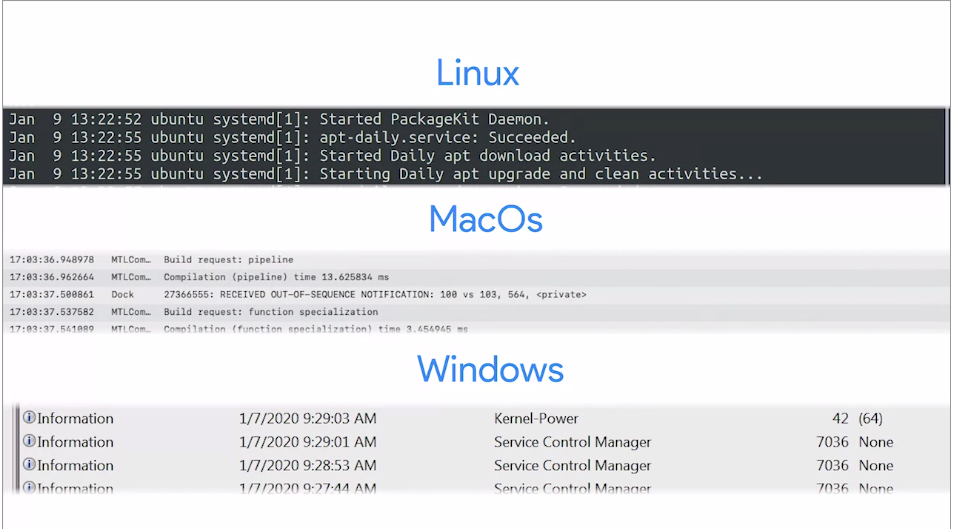

If the error logs aren't useful, one can try **Debug logging**.

On Linux, we can use ```strace``` to see what system calls a program is doing. On MacOS the tool is called ```dtruss``` and on Windows, ```Process Monitor```.

> To find the root cause of a crashing application, we'll want to look at all available logs, figure out what changed, trace the system or library calls the program makes, and create the smallest possible reproduction case.

Wrappper:
    
    A function or a program that provides a compatibility layer between two functions or programs, so they can work well together.
    
Watchdog:

    A process that checks wheter a program is running and, when is not, starts the program again.
    
```bash

date # prints the date

cd /var/log # the folder that contains logs

# -n prints out numerical addresses instead of resolving host names
# -l checks out the sockets that are listening for conection
# -p to print the process ID and name to which each socket belongs. 
sudo netstat -nlp | grep :80

# go into the folder and inspect the site file and python script
# enable bootle.debug and then reload the uwsgi
sudo service uwsgi reload
sudo chown www-data.www-data site.log # change the user ownership to receive logs
```
The ```/etc``` directory will contain the application folder that stores configuration files. 

```chown```:
    
    chown [OPTIONS] USER[:GROUP] FILE(s)
    The chown command allows you to change the user and/or group ownership of a given file, directory, or symbolic link.

### Code that Crashes

**The logging module sets debug messages to show up when the code fails.** 

Accessing invalid memory:

    Accessing invalid memory means that the process tried to acces a portion of the system's memory that wasn't assigned to it.
    
Pointers:

    The variables that store memory addresses.
    
Undefined behaviour:

    The code is doing something that's not valid in the programming language.
    
```Valgrind```:

    A very powerful tool that can tell us if the code is doing any invalid operations, no matter if it crashes or not.
    
```Traceback```:

    Shows the lines of the different functions that were being executed when the problem happened.
    
Core files:

    Store all the information related to the crash so that we, or someone else, can debug what's going on. To generate those code file use this bash command:
    
```bash
# Runs the ulimit command, then using the -c flat for core files, 
# and then unlimited to state that we want core files of any size

ulimit -c unlimited # Generates a core file

# Use the gdb debugger to go through the core file generated
gdb -c core

# now in (gdb) 
# In the gdb interpreter use the backtracing command to view the full backtrace of the crash
backtrace

# Use the up command to move to the calling function in the backtrace 
# to check the line and copy parameters that caused the crash
up
```

The problem was a ```off-by-one error```, meaning the for loop is doing one iteration too many.

The ```backtrace``` command can be used to show a summary of the function calls that were used to the point where the failure occurs.   

```bash
# The debugger for python3 is pdb or pdb3
# We could run each of the instructions in the file one by one using the next command. 
# Alternatively, we can tell the debugger to continue the execution until it either finishes or crashes

next # pdb command to go executing line by line

continue # pdb command to
```

Check out the following links for more information:

* https://realpython.com/python-concurrency/

* https://hackernoon.com/threaded-asynchronous-magic-and-how-to-wield-it-bba9ed602c32

* https://stackoverflow.com/questions/33047452/definitive-list-of-common-reasons-for-segmentation-faults

* https://sites.google.com/a/case.edu/hpcc/home/important-notes-for-new-users/debugging-segmentation-faults

Readable Python code on GitHub:

* https://github.com/fogleman/Minecraft

* https://github.com/cherrypy/cherrypy

* https://github.com/pallets/flask

* https://github.com/tornadoweb/tornado

* https://github.com/gleitz/howdoi

* https://github.com/bottlepy/bottle/blob/master/bottle.py

* https://github.com/sqlalchemy/sqlalchemy

### Crashes in complex systems (more than one computer)

Rule of thumb when the service crashes is to rollback the new changes made to reinstate a working older version.

> When dealing with complex systems like these having good logs is essential to understanding what's going on. 
> On top of that, you'll want to have good monitoring of what the service is doing and use version control for all changes so that you can quickly check what's changed and roll back when needed. 

Q: A website is producing service errors when loading certain pages. Looking at the logs, one of three web servers isn’t responding correctly to requests. What can you do to restore services, while troubleshooting further?  
A: Removing the server from the pool will provide full service to users from the remaining web servers.  

> Armed with what you've learned so far and your past experience, you might do a great job troubleshooting a problem. But if you drop the ball when it comes to communicating what you're doing, you could end up with a bunch of frustrated users calling you to find out what's going on. If you don't write down what you've tried or how you fix the problem, you risk for getting some important details and wasting a lot of valuable time when you need to revisit an issue.

#### Communication and Documentation During Incidents

Communications lead:

    Needs to know what's going on, and provide timely updates on the current state and how long until the problem's resolved.
    
Incident commander/ Incident controller:
    
    Needs to look at the big picture and decide what's the best use of the available resources.
    
Once the issue has been resolved, it's super-important to sum up the information that was helpful.The most important information that you'll want to include are:

* ```The root cause```
* ```How you diagnosed the problem and found the root cause```
* ```What you did to fix the issue``` 
* ```What needs to be done to prevent the problem from happening again```

Postmortems:

    Documents that describe details of incidents to help us learn from our mistakes

Things that matter the most in writing a postmortem:

* What caused the issue
* What the impact of the issue was
* How it got diagnosed
* The short-term remediation you applied
* The long-term remediation you recommend

Also don't forget to include what went well. The post mortem looks like it has a CV formating in the video.

:)))) : A postmortem of an incident should not include the person(s) who caused the issue.  

## Week 4: Managing memory and time

### Memory leaks and how to prevent them

Memory leak:

    A chunck of memory that's no longer nedeed is not released
    
Garbage collection:

    In charge of freeing the memory that's no longer in use
    
Q: What can we do if we suspect a program has a memory leak? 

A: We can use a memory profiler to figure out how the memory is being used.

```bash
# Use a memory profiler to figure out how the memory is being used
python3 -m memory_profiler contents_stats_simple.py

```
Reminder: An app that still needs a lot of memory, even after a restart, most likely points to a memory leak.

### Mananging disk space

Programs might need space for different reasons:

* Installed binaries and libraries
* Data stored by the application
* Cached information 
* Logs
* Temporary files
* Backups


    Some programs open a temporary file, and immediately delete the file before the process finishes, then the file continues to grow, which can cause slowdown.

    Sometimes a file is marked as deleted right after it is opened, so the program doesn't "forget" later. The file is then written to, but we can't see this as the file is already marked as deleted, but will not actually be deleted until the process is finished.

```bash
sudo lsof | grep deleted # lists open files that are deleted
```

### Network Saturation

```Latency```:

    The delay between sending a byte of data from one point and receiving it on the other. 
    This value is directly affected by the physical distance between the two points and how many intermediate         devices there are between them 
    
```Bandwidth```:

    How much data can be sent or received in a second.
    This is effectively the data capacity of the connection. 
    Internet connections are usually sold by the amount of bandwidth the customer will see
    
If you've ever run several applications using the same network at once, the overall connection speed may have seem slower. You can check out which processes are using the network connection by running a program like ```iftop```.

```iftop``` - shows how much data each active connection is sending over the network

```Traffic shapping```:

    A way of marking the data packets sent over the network with different priorities to avoid large chunck of data use all the bandwidth
    
Q: The custom application running on a server can’t receive new connections. Existing connections are sending and receiving data in a reasonable time. Which of the following explains the reason why new sessions can’t be established with the server?

A: There are limits to how many connections a single server can have, which will prevent new connections.  

### Dealing with Memory leaks

```Scroll buffer```:

    Feature that let's you scroll up and see the things that we executed and their output

Top label collumns:

* RES is for the dynamic memory that's preserved for the specific process
* SHR is for memory that's shared across processes
* VIRT lists all the virtual memory allocated for each process

Remember: **The one that usually indicates a problem is the RES column**.

Top command better explained: https://www.tothenew.com/blog/understanding-memory-utilization-in-linux/

The procedure is:

1. Run the python program
2. Open a different terminal
3. Open top
4. Observe the memory by pressing m and checking the RES collumn
5. If it takes to much memory run a memory profiler to optimize the python program
6. To use a memory profile in the script acces this module:

```python
from memory_profiler import profile
@profile
    # code
```

```Decorator```:

    Used in Python to add extra behaviour to funcitons without having to modify the code
    
### More about Managing Resources

Check out the following links for more information:

* https://realpython.com/python-concurrency/
* https://hackernoon.com/threaded-asynchronous-magic-and-how-to-wield-it-bba9ed602c32
* https://www.pluralsight.com/blog/tutorials/how-to-profile-memory-usage-in-python
* https://www.linuxjournal.com/content/troubleshooting-network-problems

How can you profile an entire Python application?

**Use the guppy module. Guppy is a Python library with tools to profile an entire Python application**.

### Managing our time

One of the very useful time managment paradigms is the Eisenhower Decision Matrix:


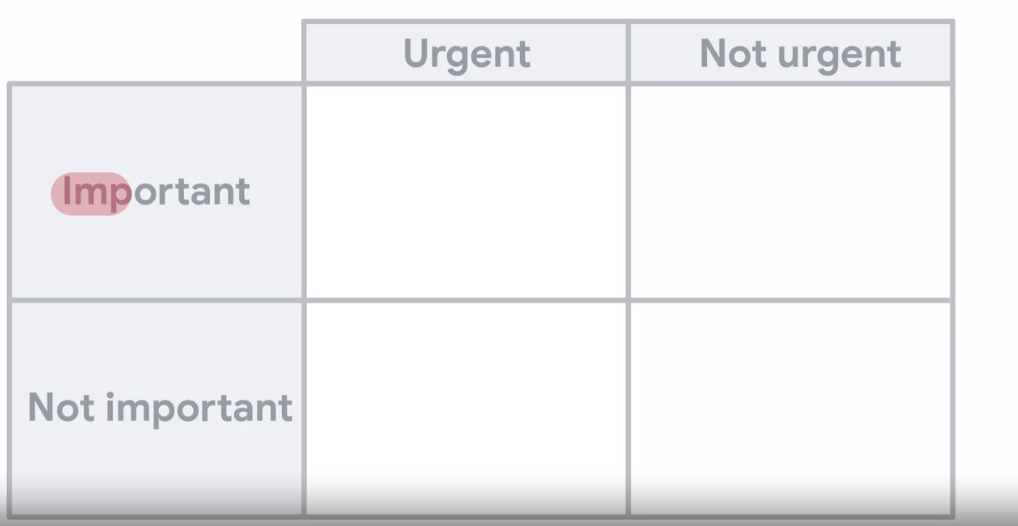

    Investing in the future can save you even more time and user frustration when responding to a problem. 
    Researching new technologies is another task in this category. 
    IT is always evolving and it's important to have time set aside to stay up to date.
    
    Taking breaks is important because it allows our creative minds to stay fresh, 
    and working on a fun side project can help us research emerging technologies and come up with new ideas. 
    
```Technical debt```:
    
    The pending work that accumulates when we choose a quick-and-easy solution instead of applying a 
    sustainable long-term one.
    When we make more work for ourselves later by taking shortcuts now.
    
**Prioritizing tasks**:
1. Make a list of all the tasks that need to get done
2. Check the real urgency of the tasks: If this isn't finished today, will something bad happen?
3. Asses the importance of each issue

If it still seems like everything is on fire, you can try dividing the tasks into groups of:
1. most important 
2. important
3. not so important 

The key is to always work on important tasks. If it's not important then it shouldn't be done at all.

#### Communicating Expectation
**Try to be clear and up front about when you expect the issue to be resolved**.

#### More about making the best use of your time
* https://blog.rescuetime.com/how-to-prioritize/

### Making our future lives easier

#### Dealing with Hard Problems

> Everyone knows that debugging is twice as hard as writing a program in the first place. So if you're as clever as you can be when you write it, how will you ever debug it?

> If the code is clear and simple it will be much easier to debug, then if it's clever but obscure.

Things to remember:

1. Develop code in small, digestible chuncks.
2. Keep your goal clear
3. Having documentation that states what the end goal should be, and the steps you took to get there can be really helpful
4. In a sticky situation the main thing to do is to remain calm
5. Sometimes a change of scenery is all we need for a new idea to pop up
6. Look for short term solution, then for long term remediation
7. Don't be afraid to ask for help. Sometimes just explain the problem to someone else can help us realise what we're missing

Rubber-duck debugging:

    Explain the problem to a rubber duck. This works because when we force ourselfves to explain a problem we 
    start thinking about the issue differently

> No one knows absolutely everything. Sometimes the best way to learn new skills and techniques is to ask others for help.

> There are times when I know that if I spend enough hours on a problem, I'll probably figure out a solution, but is that the best use of my time? Usually, the better answer is to ask someone who has done it before, to save time and frustration. And then use the problem at hand as an opportunity to keep learning, so that the next time, I can do it on my own. 

#### Proactive Practices

> If we're the ones writing the code, one thing we can do is to make sure that our code has good unit tests and integration tests

- For the test to be meaningful they need to be run often and make sure we know as soon as they fail
- Have a test enviroment, where you can deploy new code before shipping it to the rest of the users
- When using more than one computer deploy software in phases or canaries ( you update a few first and check how they behave)
- Include good debuging logging in the code, so whenever we have to figure out an issue, we can look at the logs to figure out what's going on
- Having a centralized log collection, that is when a special server logs all the logs from all servers or even all the computers in a network
- Using ticketing systems
- Remember to spend time writing documentation. Even if writing documentation isn't especially fun, having good instructions on how to solve a specific problem, knowing how to diagnose what's going on with the server, or tracking the known issues in a system can be real time savers.

> If we ask users to provide the needed information up front, we don't have to waste time and go back and forth

Q: You have a small rack of servers and other components that make up a virtual infrastructure. This rack hosts virtual machines that provide web services, and user file shares to employees in the local office, and immediate regional branches. Which component in the rack can be most easily planned for future growth?  

A: Network Attached Storage (NAS) products from vendors like NetApp can provide additional shelves to add more storage as the website’s content, and users’ data increases in size. 

> If you have to work around an issue in an application developed by someone else, it's important that you remove a bug to the relevant developers.

> If you have to work around an issue in a piece of software that you own, make sure that you write a test that catches the problem.

Q1: Which of the following is a good example of mixing and matching resources on a single server so that the running services make the best possible use of all resources?
- Run a RAM intensive application and a CPU intensive application on a server.


Q2:Which proactive practice can you implement to make troubleshooting issues in a program easier when they happen again, or face other similar issues?
- Create and update documentation.